In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from alexnet import AlexNet
from caffe_classes import class_names

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#mean of imagenet dataset in BGR
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)
alexNet = AlexNet(keep_prob=1.0,
                  num_classes=1000,
                  train_layers=[],
                  model="sample",
                  )
score = alexNet.fc8
score_softmax = tf.nn.softmax(score)

In [4]:
sess= tf.Session()
# Initialize all variables
sess.run(tf.global_variables_initializer())

# Load the pretrained weights into the model
alexNet.load_initial_weights(sess)

(-0.5, 499.5, 331.5, -0.5)

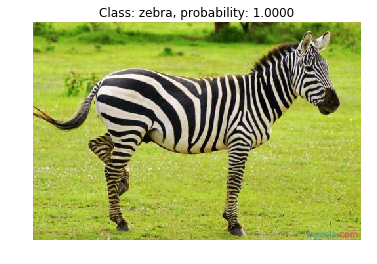

In [20]:
img_origin = cv2.imread("./images/zebra1.jpg")
# Convert image to float32 and resize to (227x227)
img = cv2.resize(img_origin.astype(np.float32), (227, 227))
# Subtract the ImageNet mean
img -= imagenet_mean
# Reshape as needed to feed into model
img = img.reshape((1, 227, 227, 3))
# Run the session and calculate the class probability
probs = sess.run(score_softmax, feed_dict={alexNet.x_input: img,
                                           alexNet.keep_prob: 1}
                )
# Get the class name of the class with the highest probability
class_name = class_names[np.argmax(probs)]
# Plot image with class name and prob in the title
plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB))
plt.title("Class: " + class_name + ", probability: %.4f" %probs[0, np.argmax(probs)])
plt.axis('off')